In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
testing_df = pd.read_csv('test.csv')

In [3]:
testing_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [4]:
train_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


<b> EDA </b>

In [5]:
testing_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [6]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


We can see that there are three columns with object data type.
- Gender
- Vehicle_Age
- Vehical_Damage

We have to encode them.

In [8]:
testing_df.duplicated().sum()
testing_df.drop_duplicates(inplace=True)
testing_df.shape

(7669866, 11)

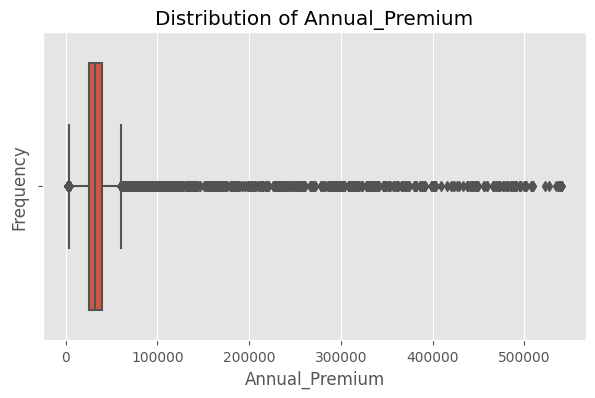

In [9]:
plt.figure(figsize=(7, 4))
sns.boxplot(x=train_df['Annual_Premium'])
plt.title('Distribution of Annual_Premium')
plt.xlabel('Annual_Premium')
plt.ylabel('Frequency')
plt.show()

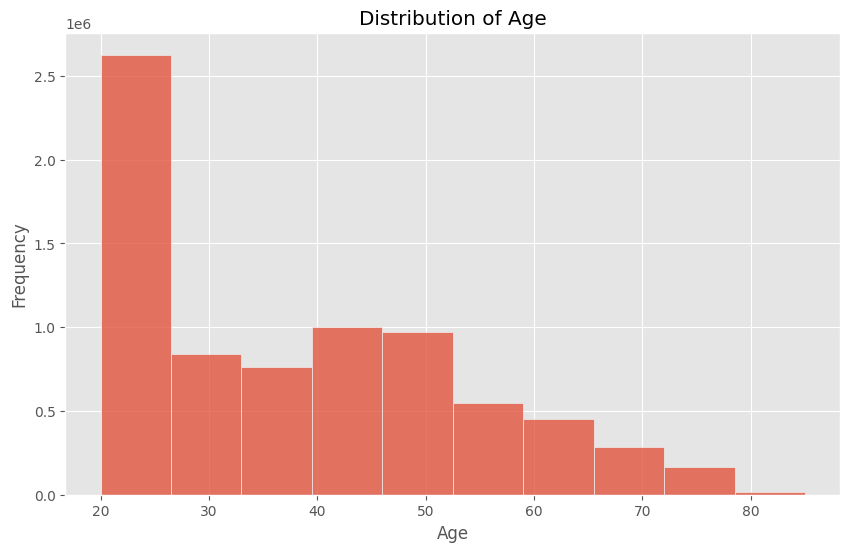

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(testing_df['Age'], kde=False, bins=10)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

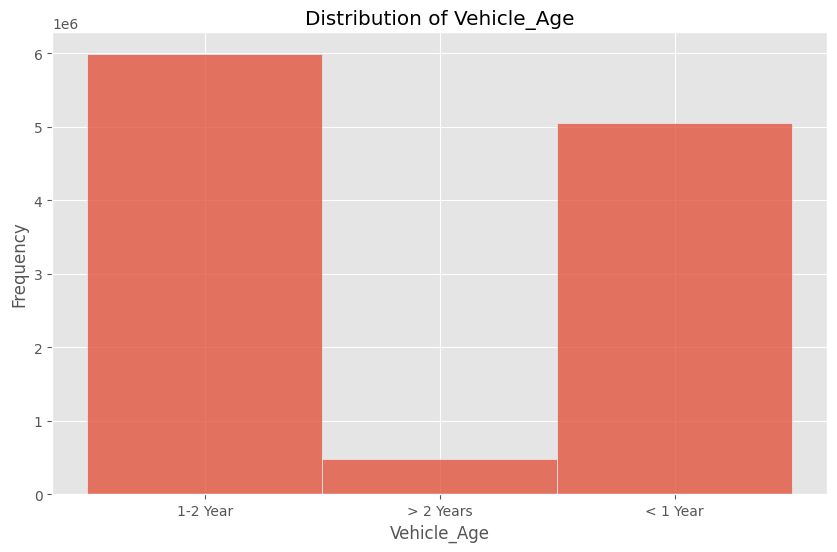

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Vehicle_Age'], kde=False, bins=10)
plt.title('Distribution of Vehicle_Age')
plt.xlabel('Vehicle_Age')
plt.ylabel('Frequency')
plt.show()

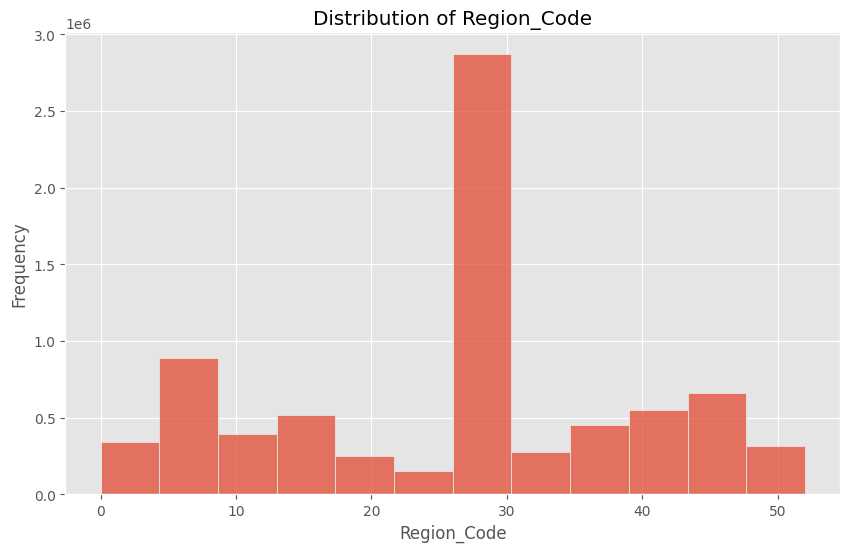

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(testing_df['Region_Code'], kde=False, bins=12)
plt.title('Distribution of Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Imbalance in Training Data Or Response')

<Figure size 600x600 with 0 Axes>

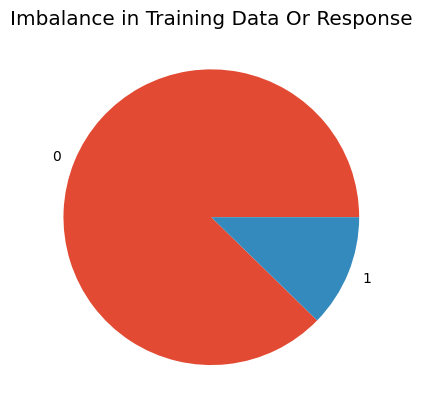

In [13]:
response_data = train_df['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Imbalance in Training Data Or Response')

<b> Feature Engineering </b>

-Cleaning traning data

In [14]:
tr_df = train_df.copy()
tr_df = tr_df.drop(columns = 'id')
tr_df['Gender'] = tr_df['Gender'].astype('category').cat.codes
tr_df['Vehicle_Damage'] = tr_df['Vehicle_Damage'].astype('category').cat.codes
tr_df['Vehicle_Age'] = tr_df['Vehicle_Age'].astype('category').cat.codes
tr_df['Vehicle_Age'] = tr_df['Vehicle_Age'].astype('category').cat.codes
num_df2 = tr_df.select_dtypes(include=[np.number])
num_df2.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,0,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,2,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,0,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,0,0,31951.0,152.0,294,0


In [15]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Gender                int8   
 1   Age                   int64  
 2   Driving_License       int64  
 3   Region_Code           float64
 4   Previously_Insured    int64  
 5   Vehicle_Age           int8   
 6   Vehicle_Damage        int8   
 7   Annual_Premium        float64
 8   Policy_Sales_Channel  float64
 9   Vintage               int64  
 10  Response              int64  
dtypes: float64(3), int64(5), int8(3)
memory usage: 735.1 MB


In [16]:
tr_df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

- Cleaning testing data

In [17]:
test_df = testing_df.copy()
test_df = testing_df.drop(columns = 'id')
test_df['Gender'] = test_df['Gender'].astype('category').cat.codes
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].astype('category').cat.codes
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].astype('category').cat.codes
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].astype('category').cat.codes
num_df1 = test_df.select_dtypes(include=[np.number])
num_df1.head()

test_df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

<b>Correlation analysis</b>

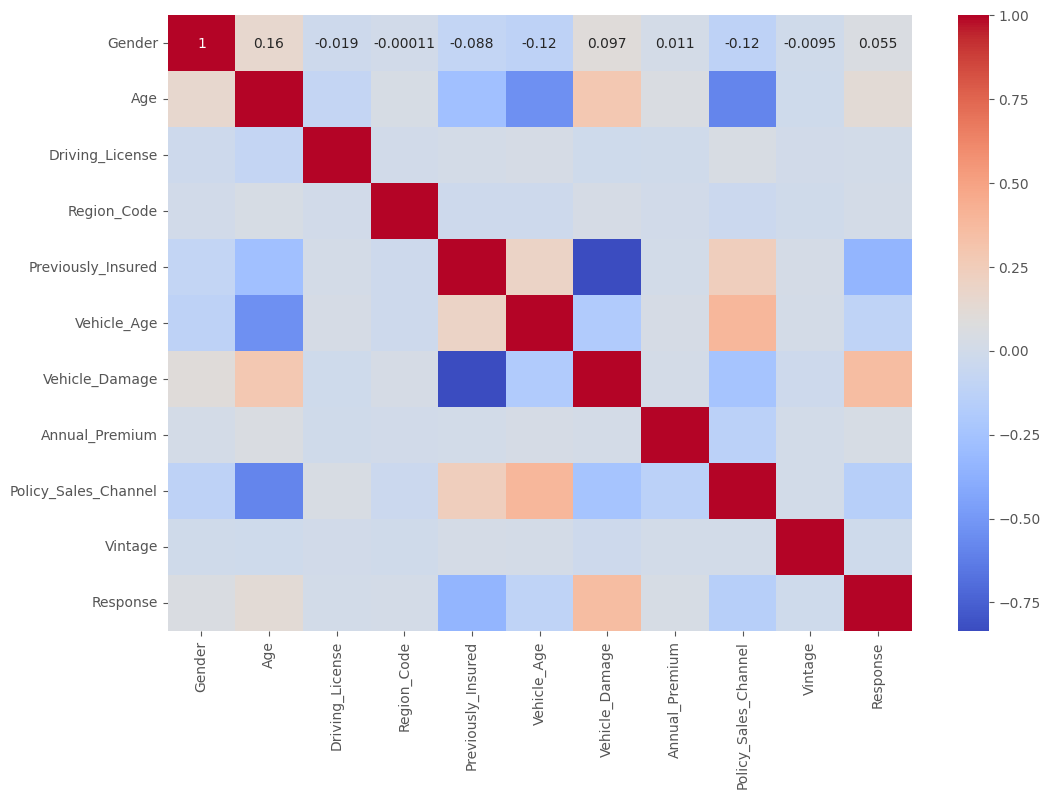

In [18]:
correlation_matrix = tr_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [19]:
corr_with_target = correlation_matrix['Response'].sort_values(ascending=False)
print(corr_with_target)

Response                1.000000
Vehicle_Damage          0.359780
Age                     0.122134
Gender                  0.055212
Annual_Premium          0.032261
Region_Code             0.012816
Driving_License         0.009197
Vintage                -0.015177
Vehicle_Age            -0.111630
Policy_Sales_Channel   -0.152733
Previously_Insured     -0.345930
Name: Response, dtype: float64


<b>Feature engineering</b>

As shown above last four columns are not much important so we should remove them to better performance.

- First I am selecting features from traning data.

In [20]:
selected_data = ['Response', 'Vehicle_Damage', 'Age', 'Gender', 'Annual_Premium', 'Region_Code', 'Driving_License']

traning_features = tr_df[selected_data]
traning_features.head()

,Response,Vehicle_Damage,Age,Gender,Annual_Premium,Region_Code,Driving_License
0,0,1,21,1,65101.0,35.0,1
1,1,1,43,1,58911.0,28.0,1
2,0,0,25,0,38043.0,14.0,1
3,0,1,35,0,2630.0,1.0,1
4,0,0,36,0,31951.0,15.0,1


- Now I am selecting features from testing beacuse the shape of traning and testing data must be same.

In [21]:
selected_data1 = ['Vehicle_Damage', 'Age', 'Gender', 'Annual_Premium', 'Region_Code', 'Driving_License']

testing_features = test_df[selected_data1]
testing_features.head()

,Vehicle_Damage,Age,Gender,Annual_Premium,Region_Code,Driving_License
0,0,20,0,2630.0,47.0,1
1,1,47,1,37483.0,28.0,1
2,1,47,1,2630.0,43.0,1
3,0,22,0,24502.0,47.0,1
4,0,51,1,34115.0,19.0,1


In [22]:
testing_features.columns

Index(['Vehicle_Damage', 'Age', 'Gender', 'Annual_Premium', 'Region_Code',
       'Driving_License'],
      dtype='object')

Using Smote To Handle Imblanced Data

In [23]:
X_train = traning_features.drop(columns=['Response'])  
y_train = traning_features['Response'] 

In [24]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [25]:
print(y_train.value_counts())
print()
print(y_train_smote.value_counts())

Response
0    10089739
1     1415059
Name: count, dtype: int64

Response
0    10089739
1    10089739
Name: count, dtype: int64


<b> Scaling Data </b>

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train_smote)
data_scaled = scaler.fit_transform(traning_features)

<b> Logistic Regression </b>

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_scaled, y_train_smote, test_size=0.3, random_state=42)

In [29]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(14125634, 6) (14125634,) (6053844, 6) (6053844,)


In [30]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [31]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    y_test_prob = model.predict_proba(x_test)[:, 1]

    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    c = precision_score(y_test,x_test_pred)
    d = recall_score(y_test,x_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="Greens")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.08890800936793
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.09888130582816
Precision Score of LogisticRegression() model is: 0.6921555827158226
Recall Score of LogisticRegression() model is: 0.9760057121861734
AUC Score of LogisticRegression() model is: 0.7935374090883051

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


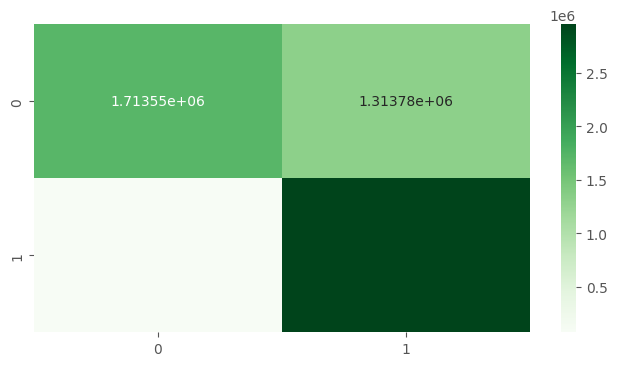

In [32]:
model_prediction(LogisticRegression())